# *Problem statement*

**PROJECT**:
Bank is has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

**Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

**On** **the** **dataset**

The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign
**Attribute** **Information:**

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?


# *1.Importing the required libraries and dataset*

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection



In [66]:
data = pd.read_excel('bankloan.xlsx')
data.head(10)
              

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
data.columns

Information on the features or attributes
The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
The binary category have five variables as below:

**Personal** **Loan** - Did this customer accept the personal loan offered in the last campaign? ***This is our target variable***
Securities Account - Does the customer have a securities account with the bank?

**CD Account** - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?


**Credit Card** - Does the customer use a credit card issued by UniversalBank?
Interval variables are as below:

Age - Age of the customer
Experience - Years of experience
Income - Annual income in dollars
CCAvg - Average credit card spending
Mortage - Value of House Mortgage
Ordinal Categorical Variables are:

Family - Family size of the customer
Education - education level of the customer
The nominal variable is :
ID,
Zip Code

In [57]:
# gives the no.of rows and columns
data.shape

(5000, 11)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   float64
 1   Income              5000 non-null   float64
 2   Family              5000 non-null   float64
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   float64
 5   Mortgage            5000 non-null   float64
 6   PersonalLoan        5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 429.8 KB


In [59]:
# for displaying the summary stats which include count,mean,std,min,etc.
data.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.507691,0.304510,0.465467,0.193791,0.440500,0.088974,0.096000,0.104400,0.06040,0.596800,0.294000
std,0.260526,0.213119,0.382554,0.174767,0.419935,0.160179,0.294621,0.305809,0.23825,0.490589,0.455637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.272727,0.143519,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.259259,0.333333,0.150000,0.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.727273,0.416667,0.666667,0.250000,1.000000,0.159055,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [60]:
data.tail(5)

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
4995,0.136364,0.148148,0.000000,0.19,1.0,0.000000,0,0,0,1,0
4996,0.159091,0.032407,1.000000,0.04,0.0,0.133858,0,0,0,1,0
4997,0.909091,0.074074,0.333333,0.03,1.0,0.000000,0,0,0,0,0
4998,0.954545,0.189815,0.666667,0.05,0.5,0.000000,0,0,0,1,0
4999,0.113636,0.347222,0.666667,0.08,0.0,0.000000,0,0,0,1,1


In [61]:
# to get the no.of null values in each column.
data.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# *2.Dropping Irrevalent columns*

In [67]:
experience = data['Experience']
age = data['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

We can see that age and experience are highly correlated.During analysis it's better to use any one of the highly correlated variables.So,it's better to drop experience
And it's also better to drop ID also ,because it seems to have the faulty data and so it's not useful for the analysis.

In [68]:
data.drop(['ID','Experience'],axis=1)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


# *3.EDA*

In [7]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
PersonalLoan             2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Zip code has more unique values i.e 467 distinct values.It's a nominal variable which has too many levels.So,it's better to drop Zipcode.

In [8]:
data[data['CCAvg']==0]['CCAvg'].count()

106

In [9]:
data[data['Mortgage']==0]['Mortgage'].count()

3462

# *3.1 Value counts of all categorical columns*

In [69]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [70]:
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [71]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [73]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [72]:
data.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [74]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

# *3.2 Univariate analysis*

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved.

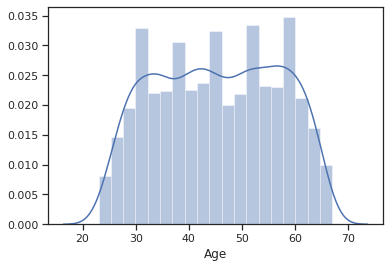

In [75]:
##distplot is the best one for univariate analysis.
## Here,we plotted the graph for the age and we can observe it's normally distributed.
sns.distplot(data.Age);

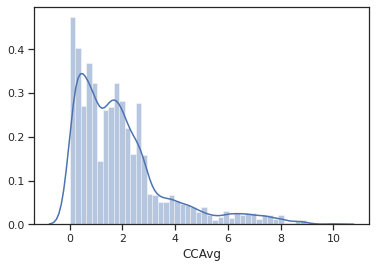

In [76]:
## the following is the graph for the credit card average.
## it's right skewed distribution.
sns.distplot(data.CCAvg);

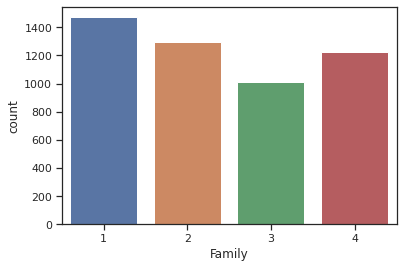

In [77]:
sns.countplot(data.Family);

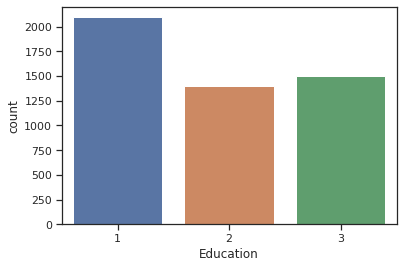

In [78]:
sns.countplot(data.Education);

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

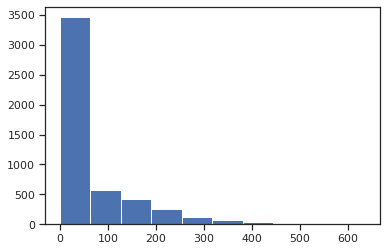

In [79]:
plt.hist(data['Mortgage'])

we can observe that most of the mortgage values are zeroes.

# *3.3 Bivariate analysis*

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables of the given data, for the purpose of determining the empirical relationship between them.

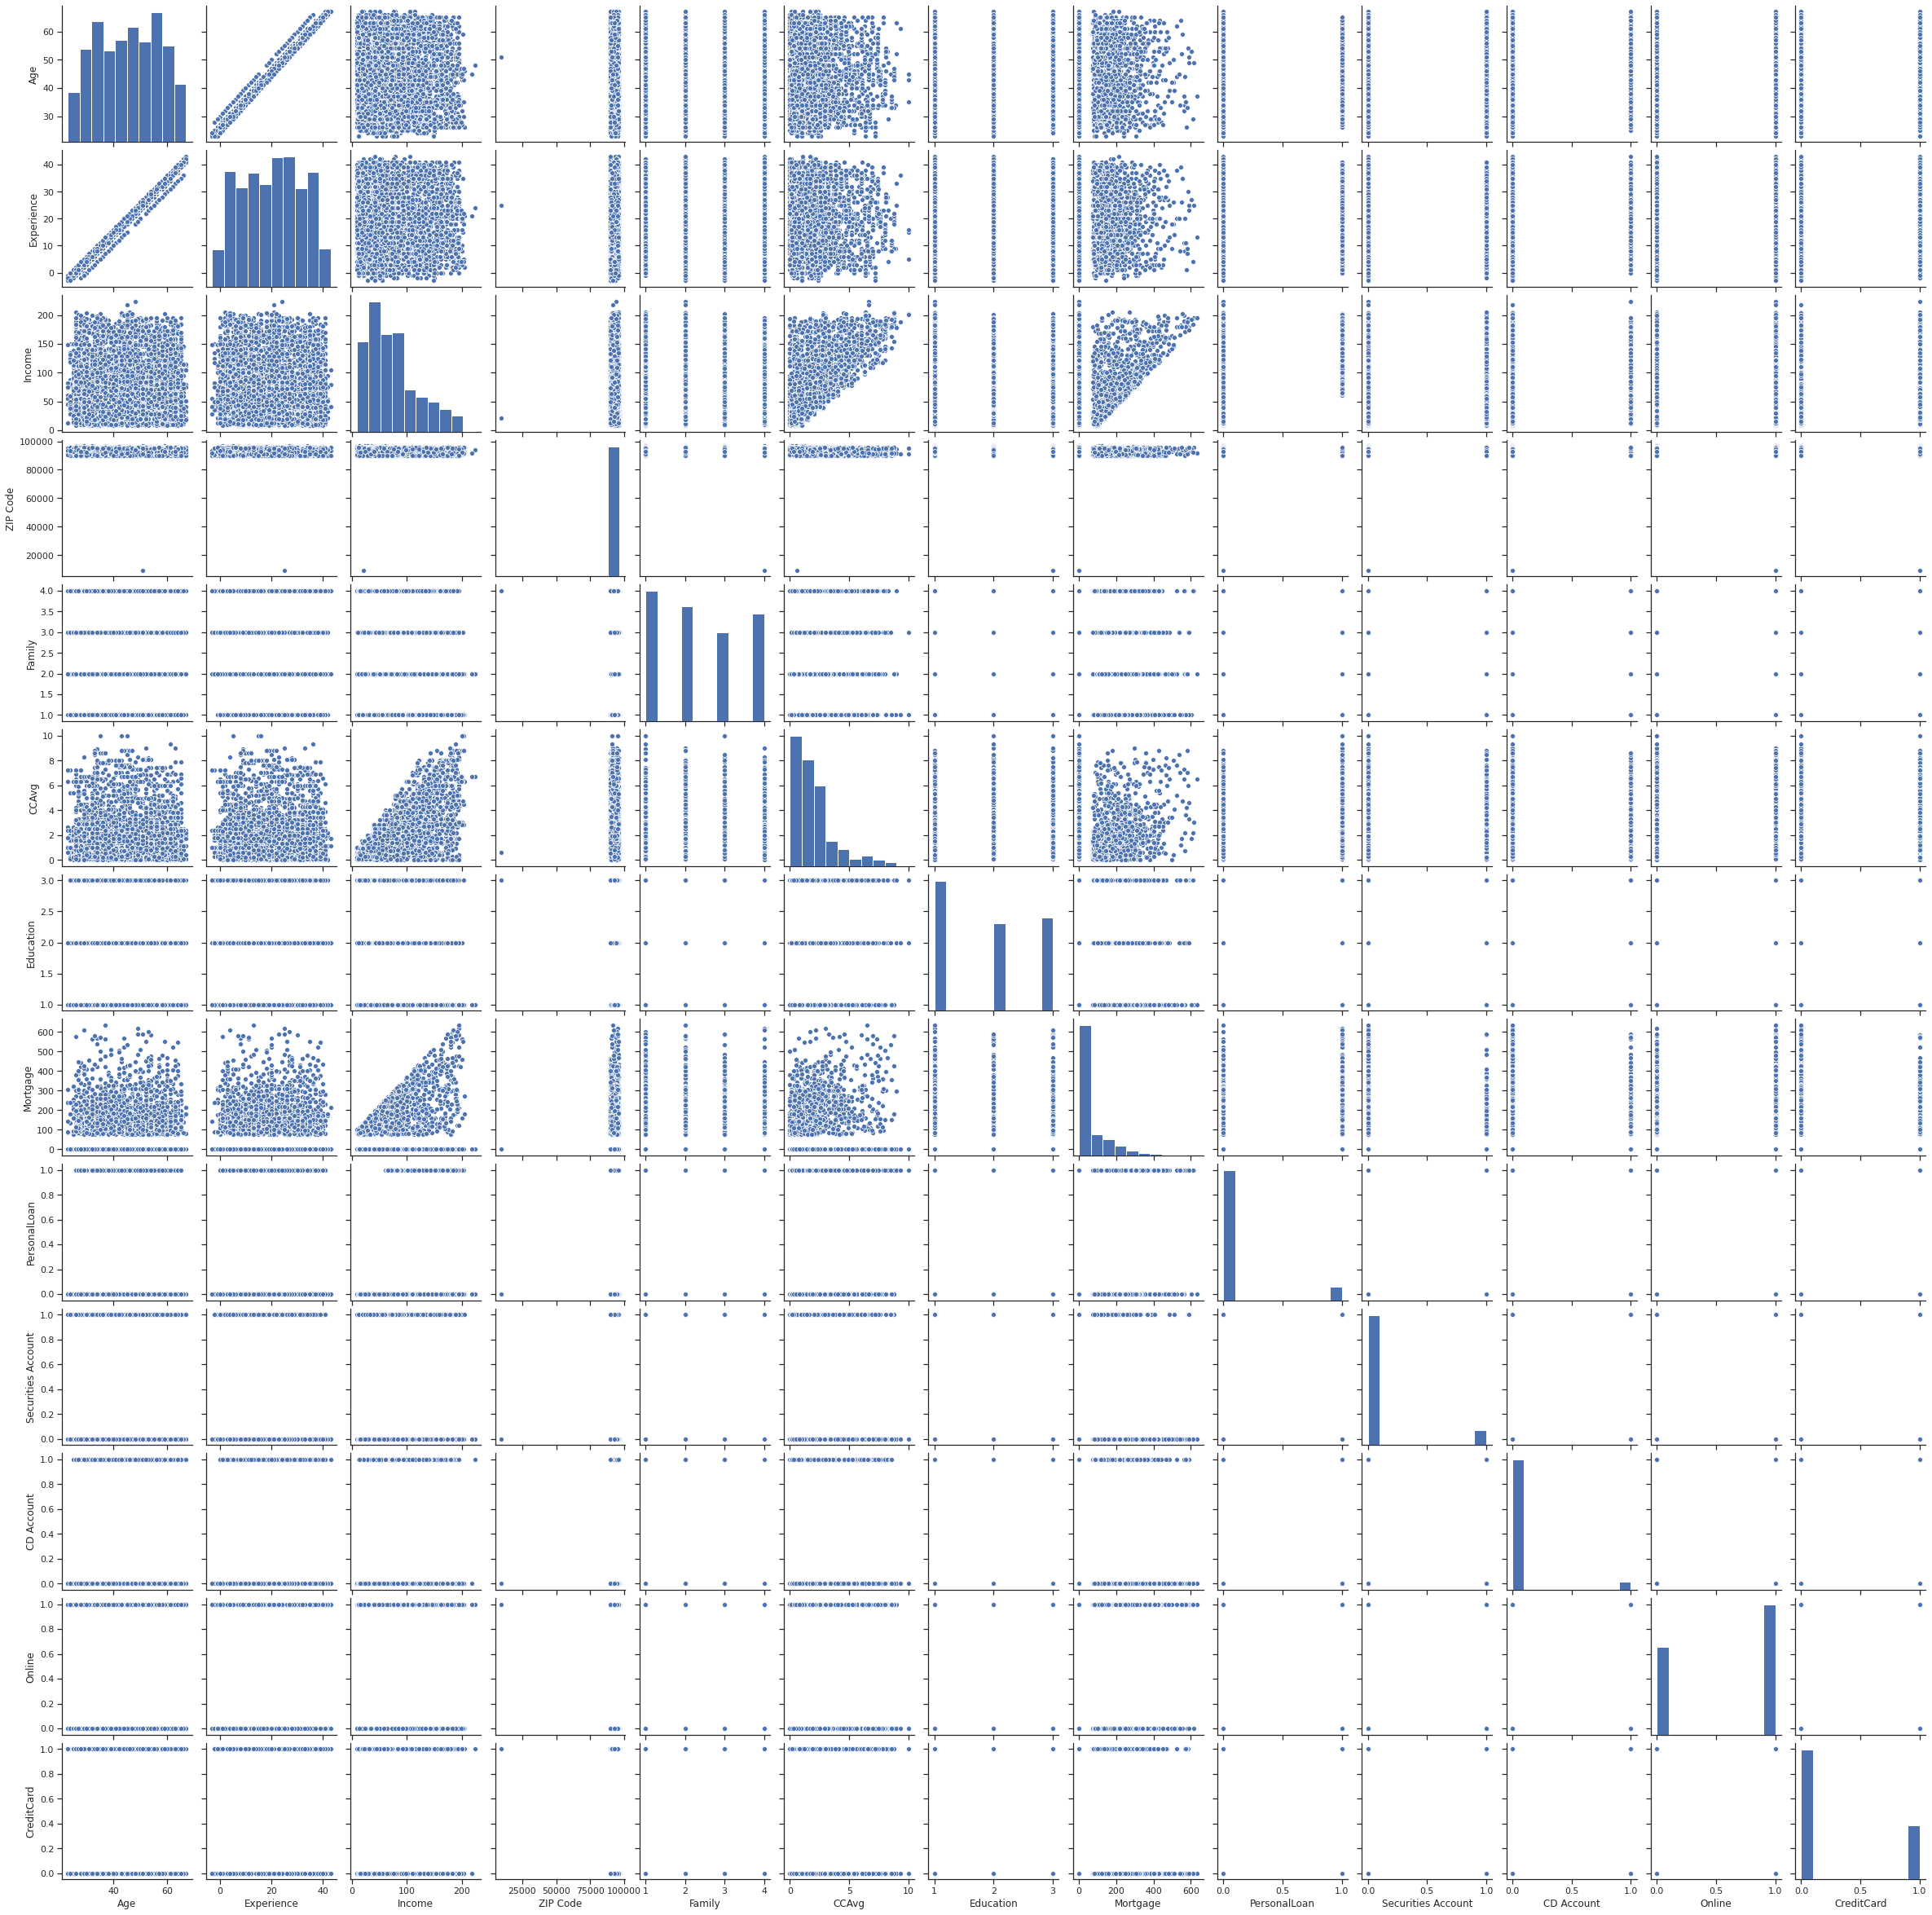

In [80]:
sns.pairplot(data.iloc[:,1:])

**Age** feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
**Experience** is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
**Income** is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
**CCAvg** is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
**Mortgage** 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
The variables family and education are ordinal variables. The distribution of families is evenly distributes

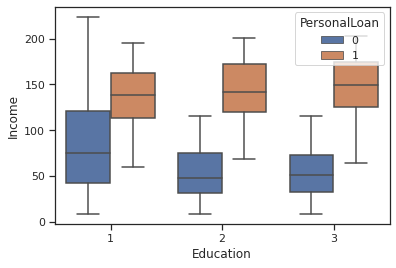

In [81]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

**Observation:**
It seems the customers whose education level 1 is having more income.However customers who
has taken the personal loan have the same income levels.

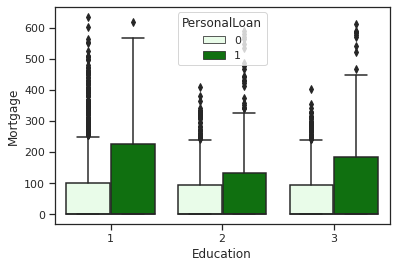

In [82]:
sns.boxplot(x='Education',y='Mortgage',hue='PersonalLoan',data=data,color='green')

**Inference:**
From the above chart it seems that customer who do not have personal loan and customer who have personal loan have high mortgage


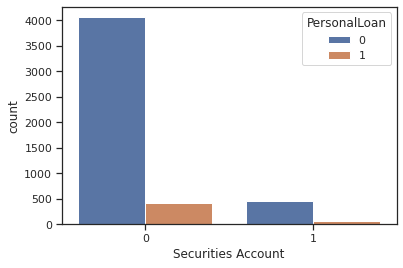

In [83]:
sns.countplot(x='Securities Account',data=data,hue='PersonalLoan')

**Observation:**
Majority of customers who doesn't have loan have securities account.

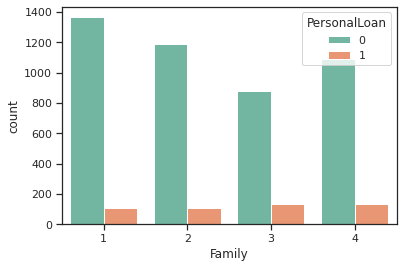

In [84]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set2')

**Observation:**
Family size doesn't have any impact on the personal loan.But it seems that families with size greater than 3 are more likely to take loan.When considering future compaign this might be goog association.

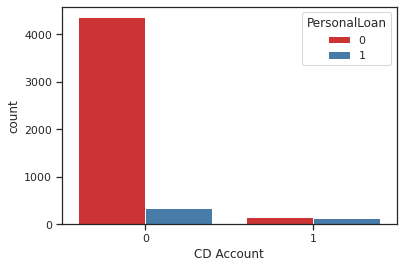

In [85]:
sns.countplot(x='CD Account',data=data,hue='PersonalLoan',palette='Set1')

**Observation:**
Customers who does not have CD account,does not have loan as well.This seems to be majority.But almost all costomers who has CD account has loan as well.

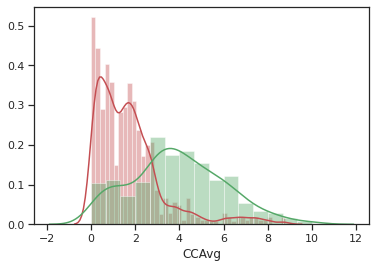

In [86]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'g')

In [87]:
#credit card spending of loan customers
data[data.PersonalLoan == 1]['CCAvg'].median()*1000

3800.0

In [68]:
#credit card spending of non-loan customers
data[data.PersonalLoan == 0]['CCAvg'].median()*1000

1400.0

**Observation:**
This graph shows that who have personal loan have a higher credit card average.Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan.Lower credit card spending with a median of 1400 dollars is less likely to take a loan.This could be useful information. 

Text(0, 0.5, 'Age')

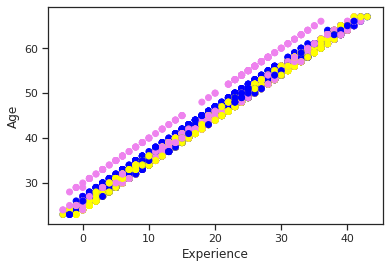

In [88]:
fig, ax = plt.subplots()
colors={1:'yellow',2:'blue',3:'violet'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

**Observation:**
From the above plot show with experience and age have a positive correlation.As experience increase age also increases.Also the colors show the education. There is gap in the mid forties of age and also more people in the undergraduate level.

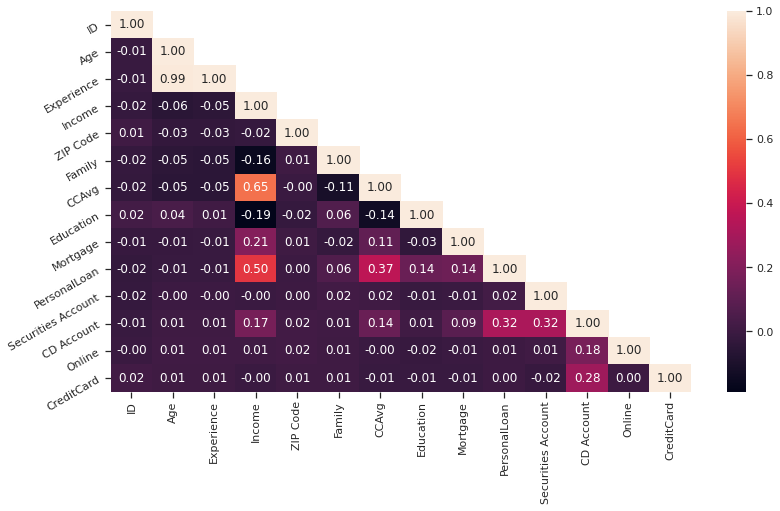

In [89]:
#finding correlation using heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Observation:**
Income and Credit card average(CCAvg) are  moderately correlated(0.65).
Age and Experience are highly correlated(we already found that earlier). 

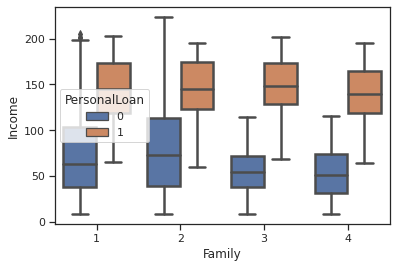

In [90]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)

**Observation:**
From the above plot we can say that families with income less than 100k are less likely to take loan, than families with high income.

# *4.Transformations*

In [91]:
data_X=data.loc[:,data.columns!="PersonalLoan"]
data_Y=data[["PersonalLoan"]]

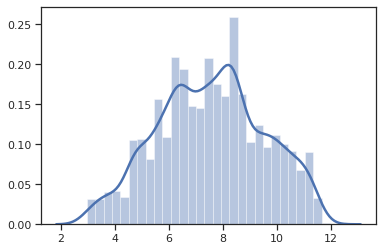

In [92]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
temp=pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(temp);

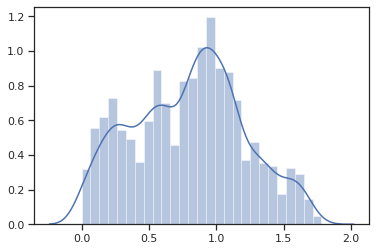

In [35]:
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp=pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp);

In [36]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


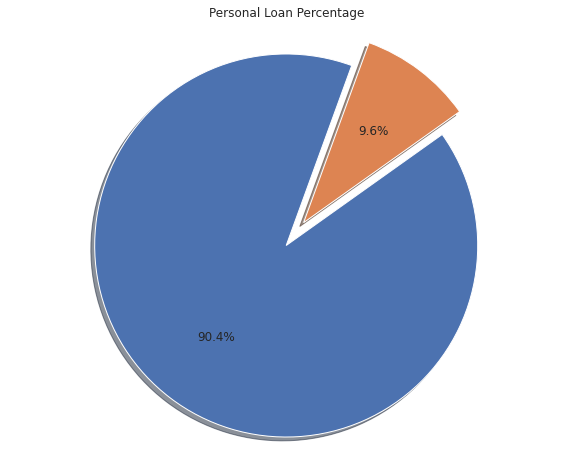

In [9]:
DF=pd.DataFrame(data['PersonalLoan'].value_counts()).reset_index()
DF.columns=['Labels','PersonalLoan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['PersonalLoan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()


In [13]:
corr = data.corr()

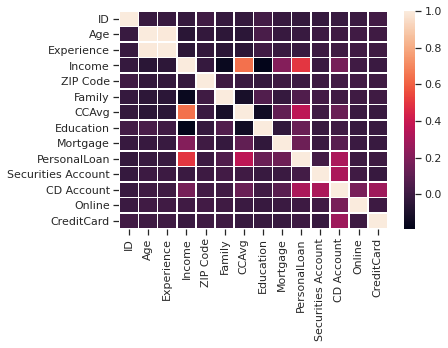

In [14]:
sns.heatmap(corr, linewidths=0.5)

In [ ]:
data.drop(['ID', 'ZIP Code', 'Experience'], axis=1, inplace=True)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
    
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0,0,0,0,1


In [46]:
X = data.drop(['PersonalLoan'], axis=1)
y = data['PersonalLoan'].values

X.shape, y.shape

((5000, 10), (5000,))

# *Splitting Data*

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 10), (1500, 10), (3500,), (1500,))

In [48]:
class_names = ['wont take loan', 'take loan']

# *Logical Regression*

In [49]:
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.86
Recall: 0.55


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

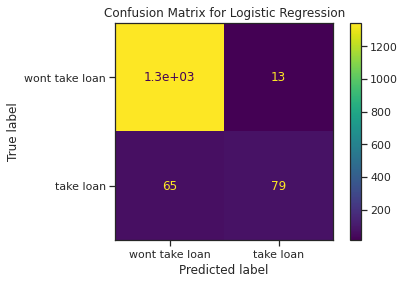

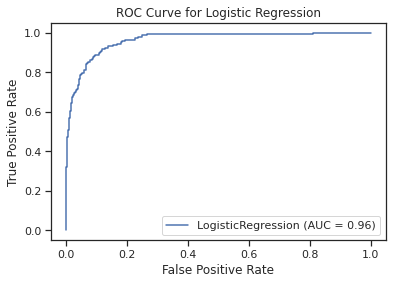

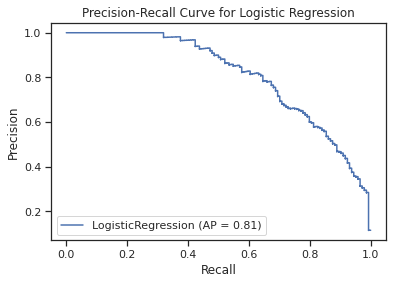

In [52]:
print('Logistic Regression Results: ')

train_score = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

# *Random forest classifier*

In [53]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.95
Recall: 0.85


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

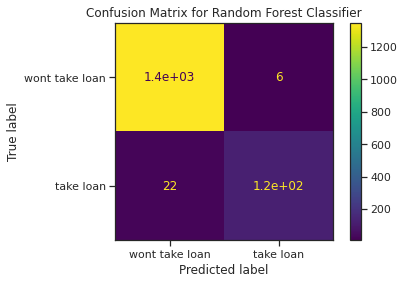

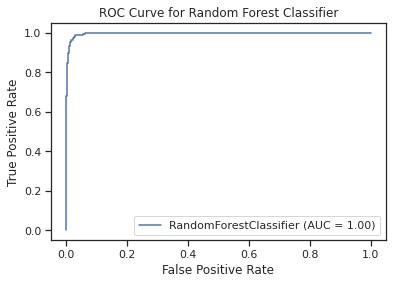

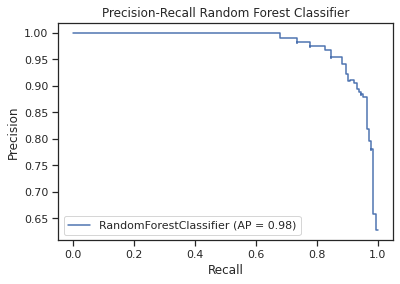

In [54]:
print('Random Forest Classifier Results: ')

train_score = rf_clf.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = rf_clf.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf_clf, X_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

# *Conclusion*

Based on the above we can conclude that random forest classifier gives the best accuracy